**Title here ( i.e., House Price Prediction)**

**Team:**
* Shelby Howard \
**Course:** CISB 60 – ML and DL (Fall, 2024)

**Problem Statement**
* In this project, I developed a K-Nearest Neighbors, Random Forest Classifier (Machine Learning) and Convolutional Neural Network (Deep Learning) to classify brain X-ray images as either "Healthy" or "Tumor." 
    
* **Keywords:** Cancer, Brain, Scan, Health, Tumor, CNN, RF, X-ray
	

**Required packages**

* Add instructions to install the required packages


In [63]:
#Import required Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

#Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


**Methodology**

    This project used two approaches to classify brain X-ray images as "Healthy" or "Tumor."


Main Topics Introduced:


**1. Random Forest:**
In the machine learning model, I used multiple decision trees for classification, combining their outputs for improved accuracy.

Process:

    Flattened images and used the pixel values as input features and applied Random Forest with 100 trees.

    Results:

    Accuracy: 0.9783%

**2. Convolutional Neural Networks (CNN):**
The deep learning model that I used was designed for image classification that automatically identifies important features in images.

Process:

    Resized images to (150, 150) and normalized pixel values, built a CNN with convolutional, pooling, and dropout layers and created a model with 10 epochs for training.

    Results:

    Test Loss: 0.1391

    Test Accuracy: 0.9739

**Key Point:**

    CNN performed much better than Random Forest and was better to test the data, with accurate results. 

### Import Data and Paths

In [2]:
#Data:
#https://www.kaggle.com/datasets/preetviradiya/brian-tumor-dataset?resource=download

import kagglehub

# Download latest version
path = kagglehub.dataset_download("preetviradiya/brian-tumor-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/shelbyhoward/.cache/kagglehub/datasets/preetviradiya/brian-tumor-dataset/versions/1


In [3]:
#Create paths for each dataset
metadata_file = os.path.join(path, "metadata.csv")
metadata_rgb_file = os.path.join(path, "metadata_rgb_only.csv")
images_folder = os.path.join(path, "Brain Tumor Data Set/Brain Tumor Data Set/")

In [4]:
#Using pandas create dataframes
metadata = pd.read_csv(metadata_file)
metadata_rgb = pd.read_csv(metadata_rgb_file)

### Display Data and Sample Images

In [5]:
#Print the head
print("Metadata Head:")
metadata.head()

Metadata Head:


,Unnamed: 0,image,class,format,mode,shape
0,0,Cancer (1).jpg,tumor,JPEG,RGB,"(512, 512, 3)"
1,1,Cancer (1).png,tumor,PNG,L,"(300, 240)"
2,2,Cancer (1).tif,tumor,TIFF,RGB,"(256, 256, 3)"
3,3,Cancer (10).jpg,tumor,JPEG,RGB,"(512, 512, 3)"
4,4,Cancer (10).tif,tumor,TIFF,RGB,"(256, 256, 3)"


In [6]:
#Print the RGB head
print("Metadata RGB Head:")
metadata_rgb.head()

Metadata RGB Head:


,Unnamed: 0,image,class,format,mode,shape
0,0,Cancer (1).jpg,tumor,JPEG,RGB,"(512, 512, 3)"
1,2,Cancer (1).tif,tumor,TIFF,RGB,"(256, 256, 3)"
2,3,Cancer (10).jpg,tumor,JPEG,RGB,"(512, 512, 3)"
3,4,Cancer (10).tif,tumor,TIFF,RGB,"(256, 256, 3)"
4,5,Cancer (100).jpg,tumor,JPEG,RGB,"(512, 512, 3)"


In [7]:
#Paths to the two folders
tumor_path = os.path.join(images_folder, "Brain Tumor")
healthy_path = os.path.join(images_folder, "Healthy")

In [8]:
#The two final data sets
tumor_images = os.listdir(tumor_path)
healthy_images = os.listdir(healthy_path)

In [9]:
#Create a function to displat sample images
def display_images(image_paths, title, n=2):
    plt.figure(figsize=(10, 5))
    for i in range(n):
        img = Image.open(os.path.join(image_paths, os.listdir(image_paths)[i]))
        plt.subplot(1, n, i + 1)
        plt.imshow(img)
        plt.title(title)
        plt.axis("off")
    plt.show()

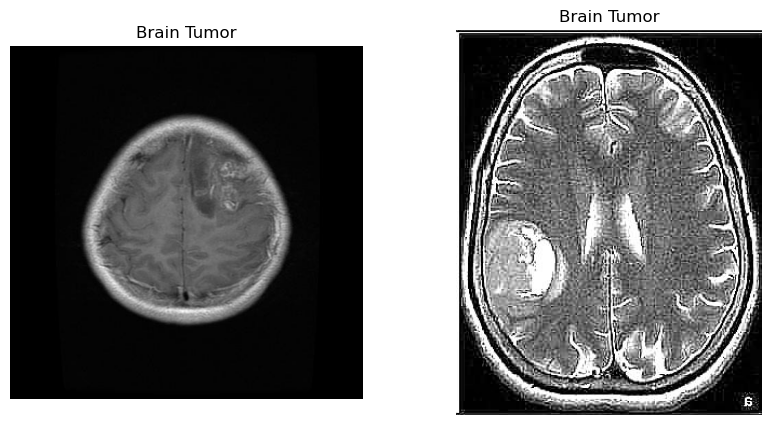

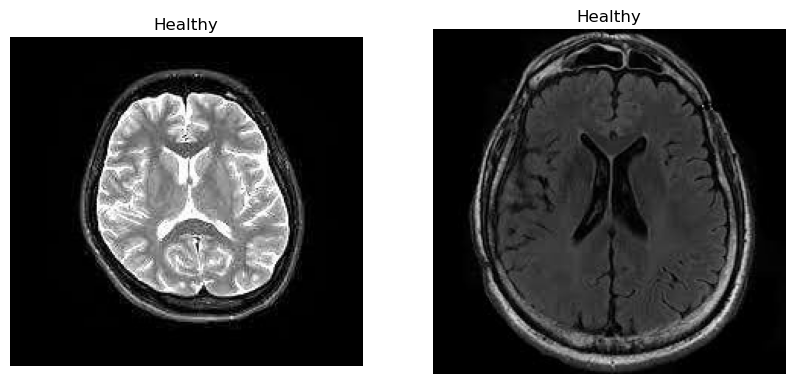

In [10]:
#Display two sample images of each using our function
display_images(tumor_path, "Brain Tumor")
display_images(healthy_path, "Healthy")

# EDA Section:

### Clean up the Data and Check Values

In [11]:
#Check for missing values in the metadata data
print(metadata.isnull().sum())

#Check for missing values in the metadata RGB data
print("\nMissing Values in Metadata RGB Only:")
print(metadata_rgb.isnull().sum())

Unnamed: 0    0
image         0
class         0
format        0
mode          0
shape         0
dtype: int64

Missing Values in Metadata RGB Only:
Unnamed: 0    0
image         0
class         0
format        0
mode          0
shape         0
dtype: int64


In [12]:
#Inspect data types for both
print("\nMetadata Data Types:")
print(metadata.dtypes)

print("\nMetadata RGB Data Types:")
print(metadata_rgb.dtypes)


Metadata Data Types:
Unnamed: 0     int64
image         object
class         object
format        object
mode          object
shape         object
dtype: object

Metadata RGB Data Types:
Unnamed: 0     int64
image         object
class         object
format        object
mode          object
shape         object
dtype: object


### Plot and Display

/Users/shelbyhoward/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


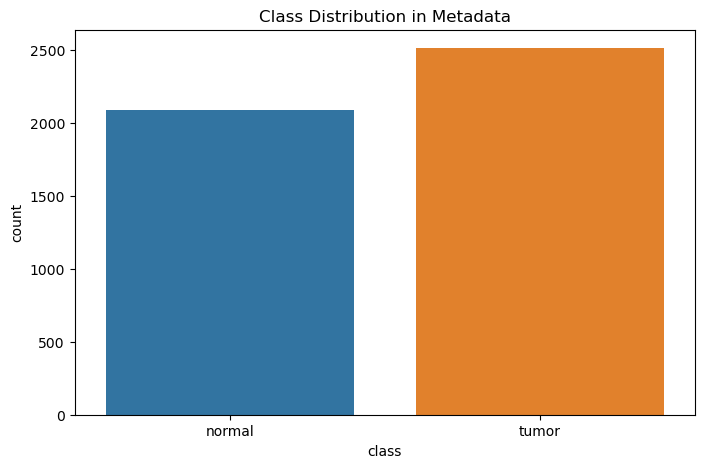

In [13]:
#Convert 'class' to categorical variable for visualization
metadata['class'] = metadata['class'].astype('category')
metadata_rgb['class'] = metadata_rgb['class'].astype('category')


plt.figure(figsize=(8, 5))
sns.countplot(data=metadata, x='class')
plt.title('Class Distribution in Metadata')
plt.show()

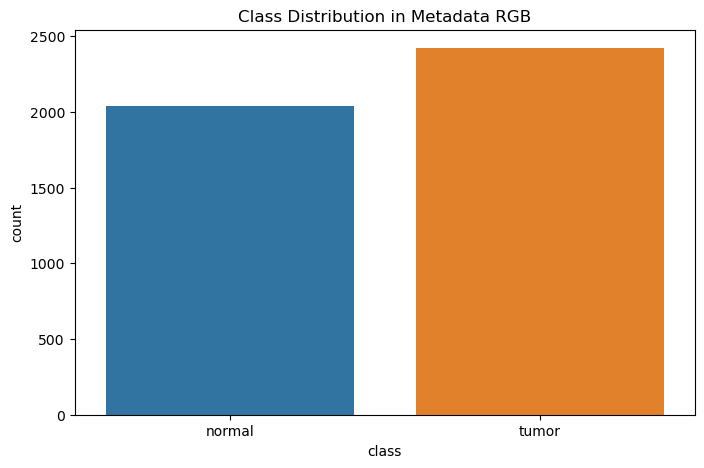

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(data=metadata_rgb, x='class')
plt.title('Class Distribution in Metadata RGB')
plt.show()

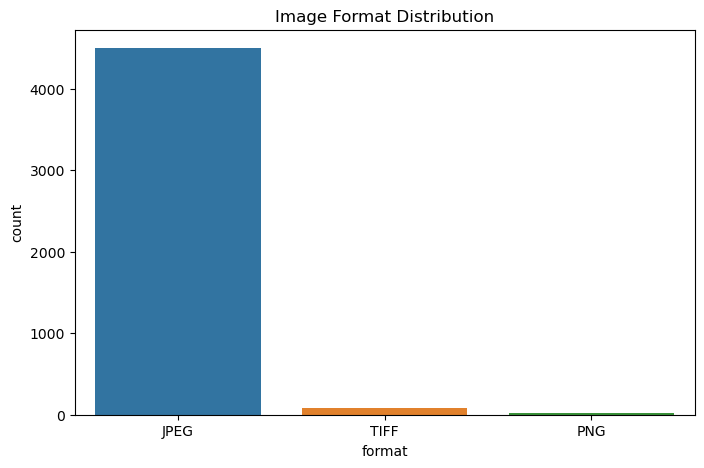

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(data=metadata, x='format', order=metadata['format'].value_counts().index)
plt.title('Image Format Distribution')
plt.show()

# Machine Learning Section:

### Random Forest model to evaluate out data:

In [18]:
#Create function to load the images from our data
def load_images(image_paths, target_size=(128, 128)):
    images = []
    for img_path in image_paths:
        #Convert to RGB to avoid errors
        img = Image.open(img_path).convert('RGB')
        #Resize the image to the target size
        img = img.resize(target_size)
        img_array = np.array(img)
        
        #Ensure the image has 3 channels (RGB), even if it was grayscale initially
        if img_array.shape != (target_size[0], target_size[1], 3):
            img_array = np.stack([img_array] * 3, axis=-1)
        
        images.append(img_array)
        #Return
    return np.array(images)

#Load images for both tumor and healthy images
tumor_images_paths = [os.path.join(tumor_path, img) for img in tumor_images]
healthy_images_paths = [os.path.join(healthy_path, img) for img in healthy_images]

#Preprocess the images and we need to resize them to 128x128
tumor_images_data = load_images(tumor_images_paths)
healthy_images_data = load_images(healthy_images_paths)

In [19]:
#Add labels to keep things clean, 1 for tumor, 0 for healthy
tumor_labels = np.ones(len(tumor_images_data))
healthy_labels = np.zeros(len(healthy_images_data))

#Combine the data and labels
X = np.concatenate((tumor_images_data, healthy_images_data), axis=0)
y = np.concatenate((tumor_labels, healthy_labels), axis=0)

In [23]:
#Flatten the images for Random Forest
X = X.reshape(X.shape[0], -1)

#Encode the labels if necessary
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

### Create A Model:

In [24]:
#Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
#Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [26]:
#Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Evaluate and Display the Model:

In [27]:
#Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [39]:
#Evaluate the model and print
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.9783
Precision: 0.9665
Recall: 0.9962


In [37]:
#Print the classification report
print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       399
           1       0.97      1.00      0.98       521

    accuracy                           0.98       920
   macro avg       0.98      0.98      0.98       920
weighted avg       0.98      0.98      0.98       920



In [29]:
#Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

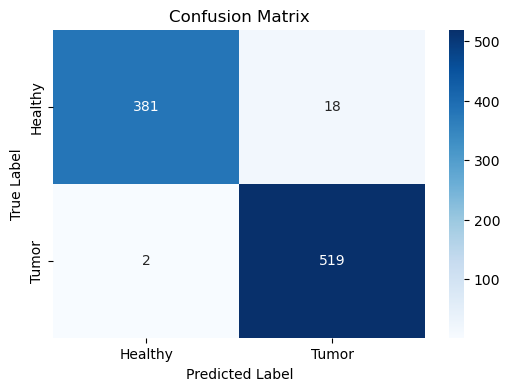

In [30]:
#Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Healthy", "Tumor"], yticklabels=["Healthy", "Tumor"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Deep Learning Section

Created a CNN Model

In [46]:
#Creating a function to lay out our CNN Model
def create_cnn_model(input_shape):
    model = Sequential()

    #Add the first convolutional layer
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #Add the second convolutional layer
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #Add the third convolutional layer
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #Flatten the data before feeding it to the dense layer
    model.add(Flatten())

    #Add a fully connected layer
    model.add(Dense(128, activation='relu'))

    #Add dropout for regularization
    model.add(Dropout(0.5))

    #Output layer with sigmoid for binary classification
    model.add(Dense(1, activation='sigmoid'))

    #Compile the model
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    #Returns our model
    return model

In [47]:
#Reshape the data
X_train = X_train.reshape(X_train.shape[0], 128, 128, 3)
X_test = X_test.reshape(X_test.shape[0], 128, 128, 3)

In [48]:
#Normalize the image data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [49]:
#Create the CNN model using our function
model = create_cnn_model(input_shape=(128, 128, 3))

/Users/shelbyhoward/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
#Train the model with early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [53]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32,validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 77s 667ms/step - accuracy: 0.9048 - loss: 0.2388 - val_accuracy: 0.8989 - val_loss: 0.2269
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 82s 712ms/step - accuracy: 0.9505 - loss: 0.1440 - val_accuracy: 0.9533 - val_loss: 0.1264
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 83s 717ms/step - accuracy: 0.9777 - loss: 0.0794 - val_accuracy: 0.9609 - val_loss: 0.1223
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 88s 767ms/step - accuracy: 0.9871 - loss: 0.0445 - val_accuracy: 0.9641 - val_loss: 0.0983
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 106s 916ms/step - accuracy: 0.9932 - loss: 0.0269 - val_accuracy: 0.9674 - val_loss: 0.1007
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 81s 708ms/step - accuracy: 0.9956 - loss: 0.0162 - val_accuracy: 0.9609 - val_loss: 0.1378
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 80s 695ms/step - accuracy: 0.9918 - loss: 0.0267 - val_accuracy: 0.9674 - val_loss: 0.1373
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 89s 774ms/step - accuracy: 0.9926 - loss: 

In [55]:
#Check our lost
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 210ms/step - accuracy: 0.9712 - loss: 0.1555
Test Loss: 0.1391
Test Accuracy: 0.9739


### Display Results

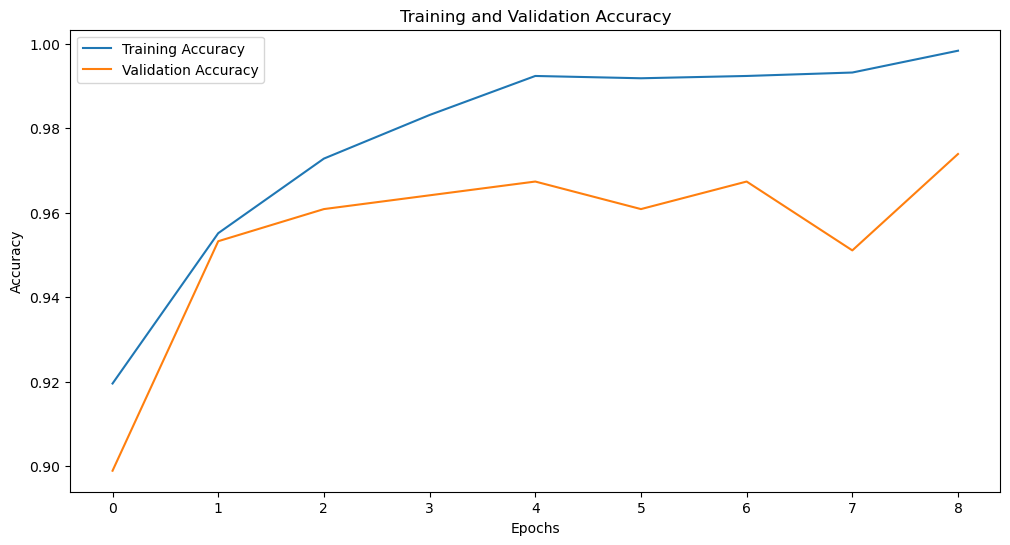

In [56]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

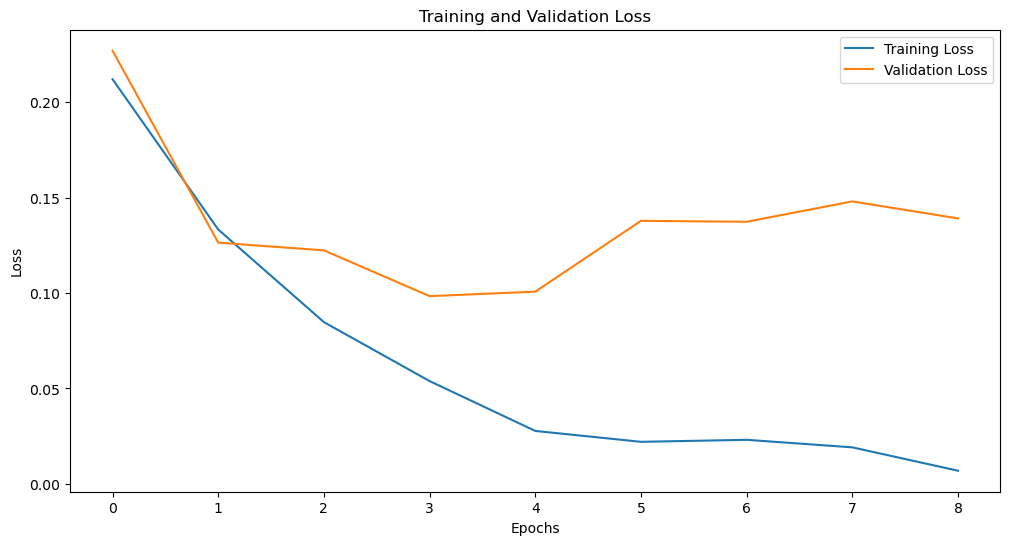

In [57]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Display Predictions from CNN Model:

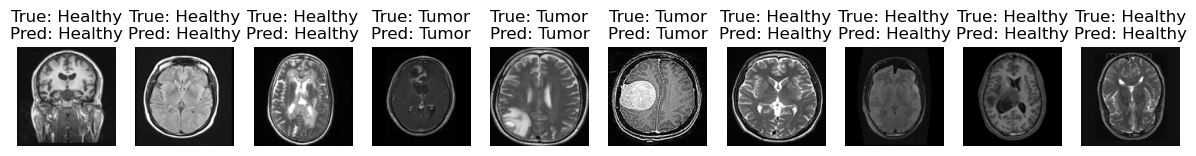

In [62]:
#Function to display images with their predictions
def display_predictions(X_test, y_test, y_pred, n=5):
    plt.figure(figsize=(15, 5))

    #Create a for loop 
    for i in range(n):
        plt.subplot(1, n, i + 1)
        img = X_test[i]
        plt.imshow(img)
        plt.title(f"True: {'Tumor' if y_test[i] == 1 else 'Healthy'}\nPred: {'Tumor' if y_pred[i] == 1 else 'Healthy'}")
        plt.axis("off")
    
    plt.show()

# Display predictions for the first 5 test images
display_predictions(X_test, y_test, y_pred, n=10)

### Compare to our RF Model

In [58]:
# Confusion Matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32")
conf_matrix = confusion_matrix(y_test, y_pred)

29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 182ms/step


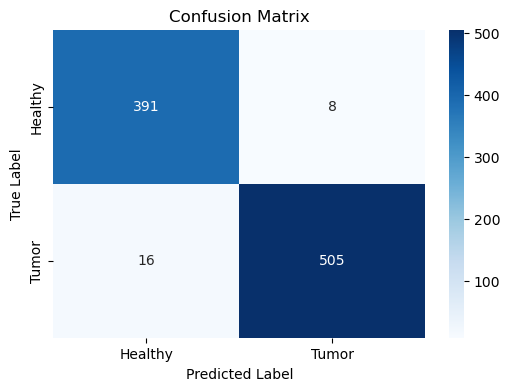

In [59]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Healthy", "Tumor"], yticklabels=["Healthy", "Tumor"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Conclusions


This project used two models to classify brain X-ray images as "Healthy" or "Tumor." 

he Random Forest model achieved high accuracy (97.83%) but relied on flattened image data, losing spatial details. Because this data is full of iumages, It was not the correct model. The CNN, with an accuracy of 97.39%, performed better by using spatial features in the images, making it the preferred model for this task. The displayed data with the compared images made the CNN the clear correct choice and was exaclty what this project needed. Being able to use both machine and deep learning was helpful in different areas but once again CNN showed the advantages of deep learning for image classification.